<a href="https://colab.research.google.com/github/mario-rot/ComputerVisionCourse-MAI/blob/main/Session%203/P3_Mario_Lauren.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratory #03 : Filters and Edges

At the end of this laboratory, you would get familiarized with

*   Convolution
*   Image Filters
*   Edge detection

## **Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---
MR
---

In [ ]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)
import numpy as np
from matplotlib import pyplot as plt
import skimage as ski
from skimage import color, data, exposure, feature, filters, io, morphology, util
from skimage.color import rgb2gray
from skimage.morphology import disk, square, rectangle, diamond
from scipy import ndimage

# Convolution
Hint: 
*   *convolve function is available in scipy.ndimage module*
*   The mask has to be normalized before convolving with the image

### Exercise:
*   Read 'camera' image from the data module
*   Convolve the image with a horizontal mask:  (1 x 15) with all values set to ones


In [ ]:
# solution
camera = data.camera()

horiz_mask = np.ones((1, 15)) / 15

horiz_conv = ndimage.convolve(camera, horiz_mask)

horiz_conv

array([[199, 199, 199, ..., 189, 189, 189],
       [199, 199, 199, ..., 189, 189, 189],
       [199, 199, 199, ..., 189, 189, 189],
       ...,
       [ 25,  25,  25, ..., 152, 152, 152],
       [ 25,  25,  25, ..., 151, 150, 152],
       [ 24,  24,  24, ..., 148, 147, 150]], dtype=uint8)

*   Convolve the image with a vertical mask:  (15 x 1) with all values set to ones

In [ ]:
# solution
vert_mask = np.ones((15, 1)) / 15

vert_conv = ndimage.convolve(camera, vert_mask)

vert_conv


array([[199, 199, 199, ..., 190, 190, 190],
       [199, 199, 199, ..., 190, 190, 190],
       [199, 199, 199, ..., 190, 190, 190],
       ...,
       [ 24,  25,  25, ..., 148, 142, 144],
       [ 24,  25,  25, ..., 146, 140, 138],
       [ 24,  25,  25, ..., 142, 139, 135]], dtype=uint8)

*   Convolve the image with a 2D mask:  (15 x 15) with all values set to ones

In [ ]:
# solution
sq_mask = np.ones((15, 15)) / (15*15)

sq_conv = ndimage.convolve(camera, sq_mask)

sq_conv


array([[199, 199, 199, ..., 190, 190, 190],
       [199, 199, 199, ..., 190, 190, 190],
       [199, 199, 199, ..., 190, 190, 190],
       ...,
       [ 24,  24,  24, ..., 148, 147, 147],
       [ 24,  24,  24, ..., 145, 144, 145],
       [ 24,  24,  24, ..., 143, 142, 142]], dtype=uint8)

*   Visualize the original image, horizontal convolution, vertical convolution, 2D convolution using matplotlib subplot.

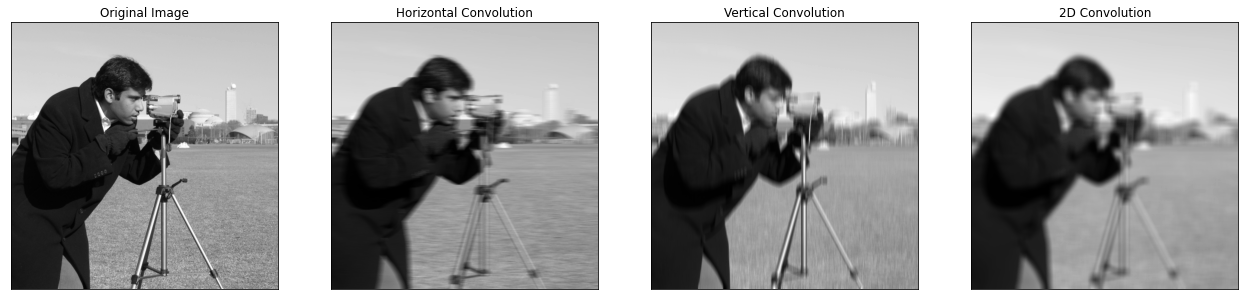

In [ ]:
# solution
fig, axs = plt.subplots(1,4, figsize = (22,5))
axs[0].imshow(camera, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(horiz_conv, cmap='gray')
axs[1].set_title('Horizontal Convolution')
axs[2].imshow(vert_conv, cmap='gray')
axs[2].set_title('Vertical Convolution')
axs[3].imshow(sq_conv, cmap='gray')
axs[3].set_title('2D Convolution')

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])


*   Apply 2 stage convolution: Horizontal mask (1 x 15) with all values set to 1 followed by vertical mask (15 x 1) with all values set to 1
*   Visualize the original image, 2D convolved image, 2 stage convolved image using matplotlib subplot.


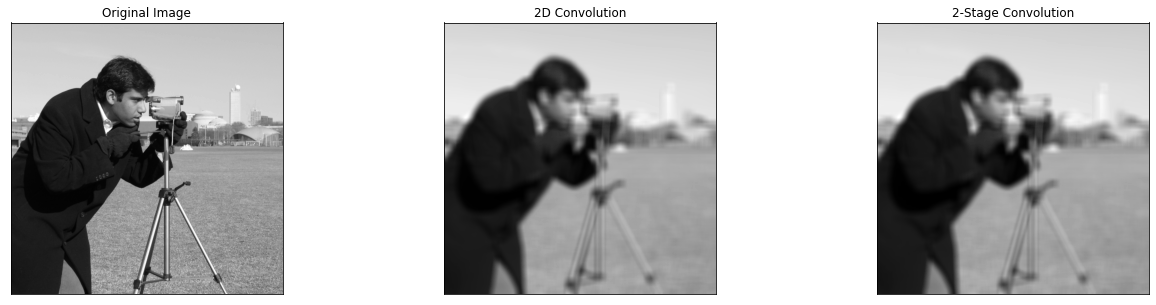

In [ ]:
# solution
conv_1 = ndimage.convolve(camera, horiz_mask)
conv_2 = ndimage.convolve(conv_1, vert_mask)

fig, axs = plt.subplots(1,3, figsize = (22,5))
axs[0].imshow(camera, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(sq_conv, cmap='gray')
axs[1].set_title('2D Convolution')
axs[2].imshow(conv_2, cmap='gray')
axs[2].set_title('2-Stage Convolution')

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

*   Is the result different from applying convolution with 2D mask (15 x 15) with all values set to 1?

**Solution**

*Although there are small differences in some of the values of the resulting image array (+/- 1), the 2D convolved image itself appears identical to the 2-stage convolved image. The differences in array values are likely due to numerical precision used in each function.*

# Image Blurring

*   Why is blurring important?



**Solution**

*Blurring can be used for a variety of purposes, including smoothing, noise reduction, pattern detection, and information extraction.*

### Exercise: Gaussian Filter
*   Read 'astronaut' image from the data module
*   Convert the image to grayscale.
*   Apply a gaussian filter with sigma=1
*   Hint: *gaussian function is available in skimage.filters module*

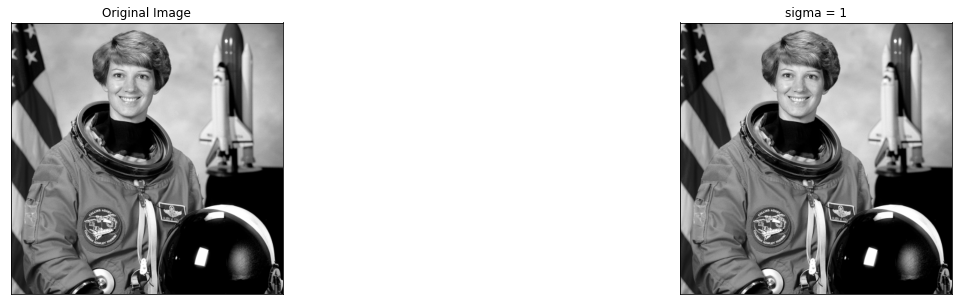

In [ ]:
# solution
astronaut = data.astronaut()

astronaut_gray = rgb2gray(astronaut)

sigma1 = filters.gaussian(astronaut_gray, 0)

fig, axs = plt.subplots(1,2, figsize = (22,5))
axs[0].imshow(astronaut_gray, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(sigma1, cmap='gray')
axs[1].set_title('sigma = 1')

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])



*   Apply a gaussian filter with sigma=0. What is the result of this operation?

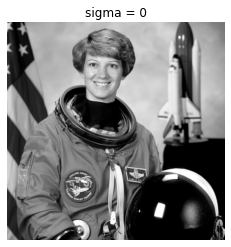

In [ ]:
# solution
sigma0 = filters.gaussian(astronaut_gray, 0)

plt.imshow(sigma0, cmap='gray')
plt.title('sigma = 0')
_ = plt.axis('off')



*   Vary the value of sigma in the gaussian filter. Apply sigma=0.25, 0.5, 1, 1.5, 2, 5
*   Visualize the different results using matplotlib subplot.

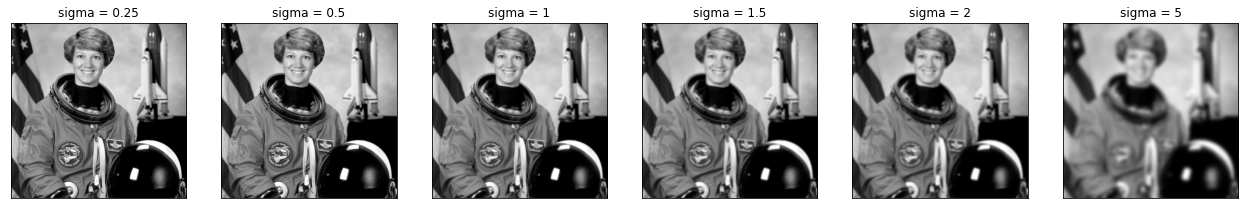

In [ ]:
# solution
sigma_25 = filters.gaussian(astronaut_gray, 0.25)
sigma_5 = filters.gaussian(astronaut_gray, 0.5)
sigma1 = filters.gaussian(astronaut_gray, 1)
sigma1_5 = filters.gaussian(astronaut_gray, 1.5)
sigma2 = filters.gaussian(astronaut_gray, 2)
sigma5 = filters.gaussian(astronaut_gray, 5)

fig, axs = plt.subplots(1,6, figsize = (22,5))
axs[0].imshow(sigma_25, cmap='gray')
axs[0].set_title('sigma = 0.25')
axs[1].imshow(sigma_5, cmap='gray')
axs[1].set_title('sigma = 0.5')
axs[2].imshow(sigma1, cmap='gray')
axs[2].set_title('sigma = 1')
axs[3].imshow(sigma1_5, cmap='gray')
axs[3].set_title('sigma = 1.5')
axs[4].imshow(sigma2, cmap='gray')
axs[4].set_title('sigma = 2')
axs[5].imshow(sigma5, cmap='gray')
axs[5].set_title('sigma = 5')

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])


*    What happens when a larger sigma value is used and what happens when a smaller sigma value is used in the gaussian filter?
*    What determines the optimal sigma value?




**Solution**

*The sigma value is the standard deviation of the Gaussian kernel, and a larger sigma value produces a blurrier image.*

*Since taking the derivative of the Gaussian kernel can be used for edge detection, the optimal sigma value in edge detection applications would be determined by the scale of the edges to be detected. For example, larger scale edges would be more effectively detected with a larger sigma value.*


### Exercise: Median Filter
*   Convert the 'astronauts' image to grayscale
*   Apply median filter with a disk structuring element of radius 1, 5, 10
*   Visualize the original image and the filtered image matplotlib subplot.

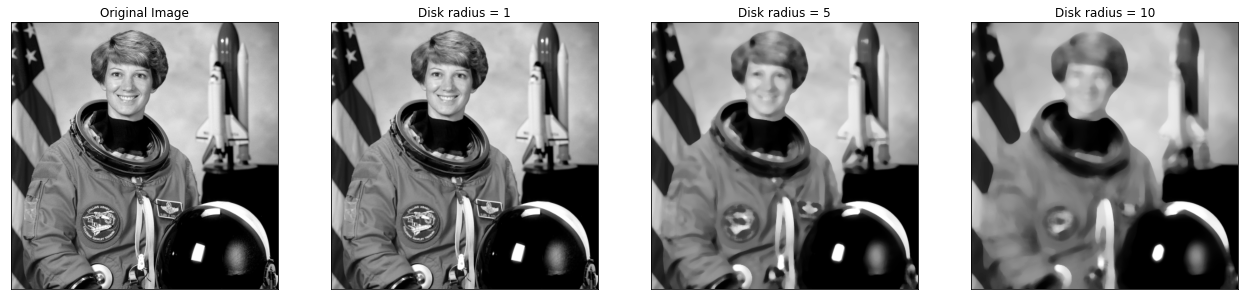

In [ ]:
# solution

disk1 = filters.median(astronaut_gray, disk(1))
disk5 = filters.median(astronaut_gray, disk(5))
disk10 = filters.median(astronaut_gray, disk(10))

fig, axs = plt.subplots(1,4, figsize = (22,5))
axs[0].imshow(astronaut_gray, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(disk1, cmap='gray')
axs[1].set_title('Disk radius = 1')
axs[2].imshow(disk5, cmap='gray')
axs[2].set_title('Disk radius = 5')
axs[3].imshow(disk10, cmap='gray')
axs[3].set_title('Disk radius = 10')

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

*   Change the structuring element to square, rectangle and diamond
*   Visualize the original image and the filtered image using matplotlib

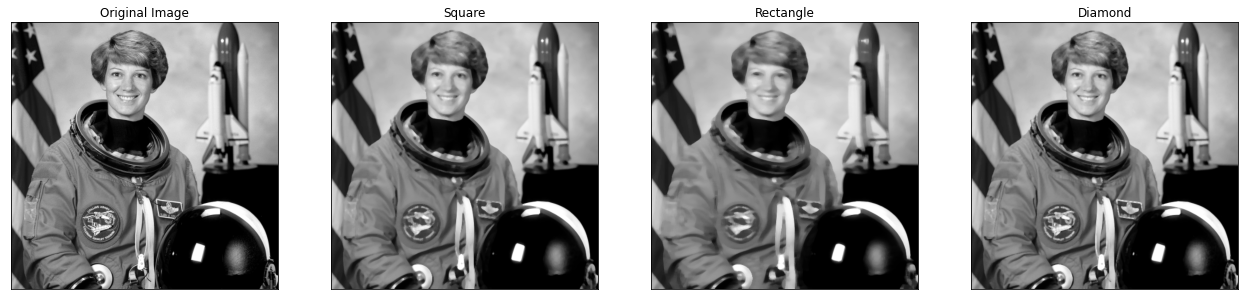

In [ ]:
# solution

sq = filters.median(astronaut_gray, square(5))
rect = filters.median(astronaut_gray, rectangle(5, 10))
dmd = filters.median(astronaut_gray, diamond(2.5))

fig, axs = plt.subplots(1,4, figsize = (22,5))
axs[0].imshow(astronaut_gray, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(sq, cmap='gray')
axs[1].set_title('Square')
axs[2].imshow(rect, cmap='gray')
axs[2].set_title('Rectangle')
axs[3].imshow(dmd, cmap='gray')
axs[3].set_title('Diamond')

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

*   What is the effect of the structuring element on the median filter?


**Solution**

*The shape of the structuring element changes the "direction" of the blur. For example, the square and the diamond, being similar in shape (just with different rotations), have similar blur patterns, while horizontal rectangle blurs horizontally. Regardless of the shape chosen, increasing the size of the filter will increase the amount of blur.*

*   What is the difference between gaussian filter, mean filter and median filter?
*   Provide an example where each one would be used.


**Solution**

*Mean filtering takes the average of all neighboring pixels and applies this average to all pixels in the neighborhood. Median filtering takes the median value of all neighboring pixels and applies this value to all pixels in the neighborhood. Gaussian filtering doesn't weight all the neighboring pixels evenly, and instead gives higher weights to closer neighboring pixels, and lower weights to those that are farther away.*

*The median filter is often more effective than the mean filter at reducing noise while maintaining image detail, since outliers won't affect the median value as much. For this reason, median filtering would be good for an image with a lot of salt-and-pepper noise, since these are outliers. Additionally, because the median value is already an existing pixel value, the median filter will often provide a more realistic value than the mean filter, which might create a pixel value that did not exist before. Because of this, the median filter is a good choice when the user wants to preserve edges.*

*On the other hand, if the user wishes to instead smooth any edges, a mean filter would be the best way to achieve this, since it provides a greater smoothing effect.*

*Gaussian filters achieve a similar effect to the mean filter, but is better at edge preservation, so if a gentle smoothing effect with edge preservation is desired, Gaussian filters are a good choice. Additionally, Gaussian filters are computationally more efficient than either the mean or the median filter, so if efficiency is important, Gaussian filters are a strong option.*

### Exercise: Effect of noise

It is easy to add noise to an image using the random_noise function available in skimage.util

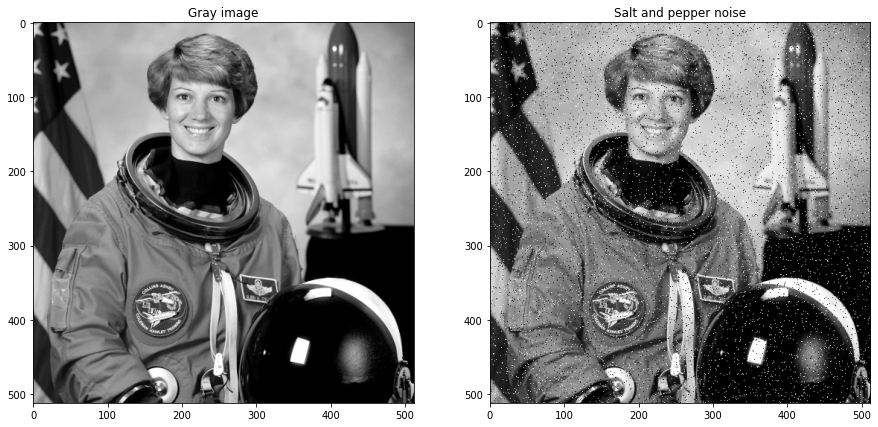

In [ ]:
from skimage.util import random_noise
image = data.astronaut()
image = color.rgb2gray(image)

img_noise = random_noise(image, mode='s&p')  # salt and pepper noise is added

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15, 7))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Gray image')
ax[1].imshow(img_noise, cmap='gray')
ax[1].set_title('Salt and pepper noise')

plt.show()

*   Create noisy images with **gaussian** noise and **salt and pepper** noise.
*   Apply mean filter, median filter and gaussian filter in each of the noisy images.
*   Visualize the images and observe the difference in each filter with respect to the noise.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  


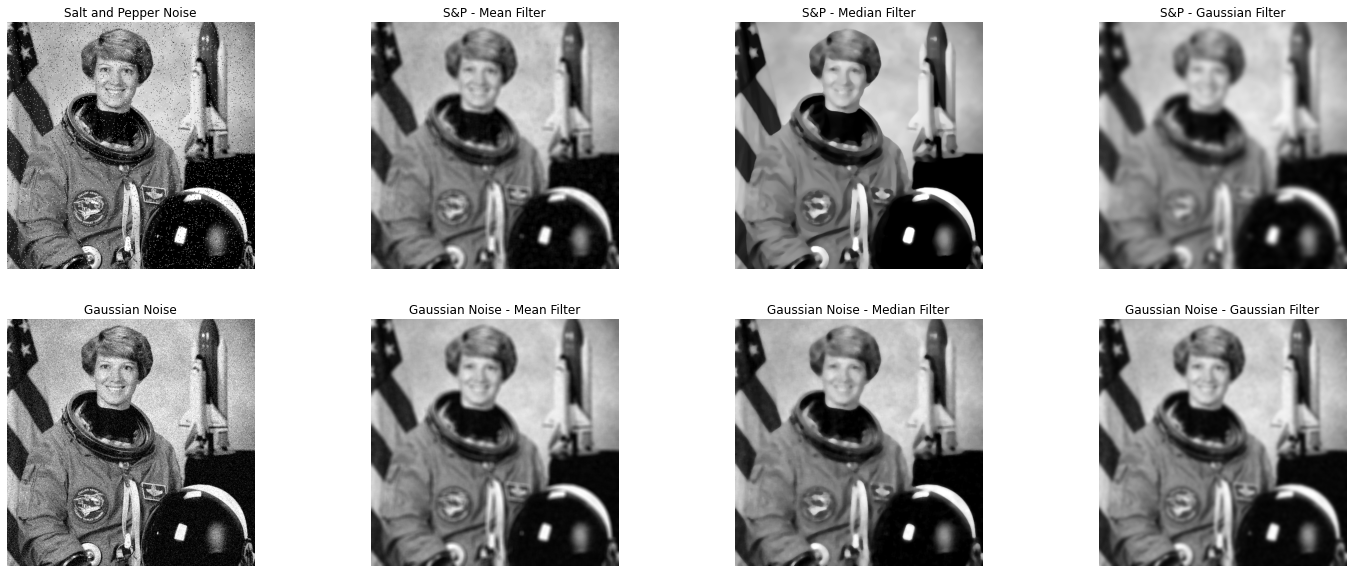

In [ ]:
# solution
gauss_noise = random_noise(image, mode='gaussian')

sp_mean = filters.rank.mean(img_noise, disk(5))
sp_median = filters.median(img_noise, disk(5))
sp_gauss = filters.gaussian(img_noise, 5)

g_mean = filters.rank.mean(gauss_noise, disk(5))
g_median = filters.median(gauss_noise, disk(5))
g_gauss = filters.gaussian(gauss_noise, 3)

fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(25, 10))

axs[0][0].imshow(img_noise, cmap='gray')
axs[0][0].set_title('Salt and Pepper Noise')
axs[0][0].axis('off')
axs[0][1].imshow(sp_mean, cmap='gray')
axs[0][1].set_title('S&P - Mean Filter')
axs[0][1].axis('off')
axs[0][2].imshow(sp_median, cmap='gray')
axs[0][2].set_title('S&P - Median Filter')
axs[0][2].axis('off')
axs[0][3].imshow(sp_gauss, cmap='gray')
axs[0][3].set_title('S&P - Gaussian Filter')
axs[0][3].axis('off')
axs[1][0].imshow(gauss_noise, cmap='gray')
axs[1][0].set_title('Gaussian Noise')
axs[1][0].axis('off')
axs[1][1].imshow(g_mean, cmap='gray')
axs[1][1].set_title('Gaussian Noise - Mean Filter')
axs[1][1].axis('off')
axs[1][2].imshow(g_median, cmap='gray')
axs[1][2].set_title('Gaussian Noise - Median Filter')
axs[1][2].axis('off')
axs[1][3].imshow(g_gauss, cmap='gray')
axs[1][3].set_title('Gaussian Noise - Gaussian Filter')
_ = axs[1][3].axis('off')

*   Which filter works better for gaussian noise and which filter works better for salt and pepper noise? Explain your choice of the filter for that particular type of noise.


**Solution**

*The median filter is the most effective for salt-and-pepper noise (for reasons discussed in the previous solution). For Gaussian noise, the mean and Gaussian filters outperform the median filter, and they both have similar performance when certain values for the parameters are specified (such as sigma=3 for the Gaussian filter and disk radius=5 for the mean filter). These two filters effectively remove noise while maintaining relatively clear image detail.*

# Image Sharpening

A sharpening filter can be broken down into two steps: It takes a smoothed image, subtracts it from the original image to obtain the "details" of the image, and adds the "details" to the original image.

enhanced image = original + amount * (original - blurred)

### Exercise:
*   Read 'moon' image from the data module
*   Perform smoothing using a gaussian filter of sigma 1
*   Subtract the smoothened image from the original image.
*   Enhance the image with amount=1
*   Visualize each of the steps using matplotlib

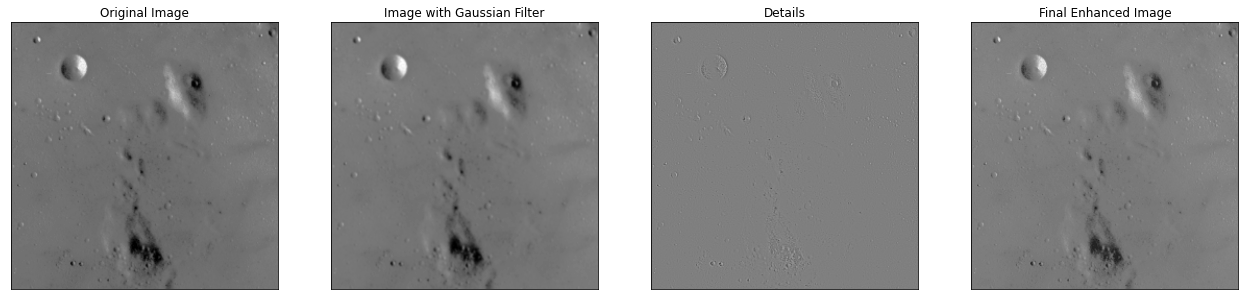

In [ ]:
# solution
moon = data.moon()
g_moon = filters.gaussian(moon, 1, preserve_range=True)

details = moon - g_moon
enhanced = moon + 1 * details

fig, axs = plt.subplots(1,4, figsize = (22,5))
axs[0].imshow(moon, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(g_moon, cmap='gray')
axs[1].set_title('Image with Gaussian Filter')
axs[2].imshow(details, cmap='gray')
axs[2].set_title('Details')
axs[3].imshow(enhanced, cmap='gray')
axs[3].set_title('Final Enhanced Image')

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

*   Keeping amount=1, change the value of sigma=5,10 and repeat the enhancements
*   Using the best sigma value, vary the amount value=0.5,2,5,10
*   Visualize the sharpened images using matplotlib

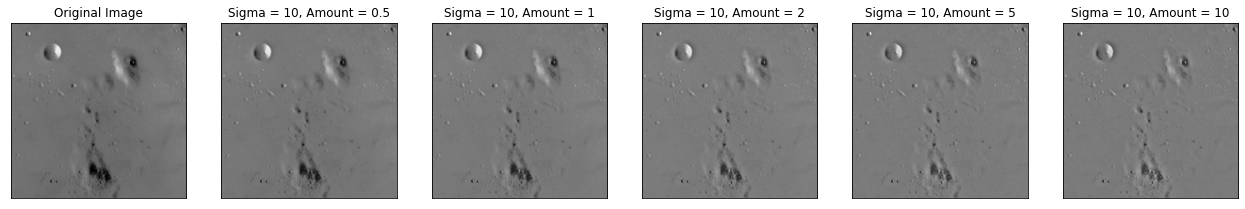

In [ ]:
# solution
g_moon5 = filters.gaussian(moon, 5, preserve_range=True)
g_moon10 = filters.gaussian(moon, 10, preserve_range=True)

# # sigma = 5
# details = moon - g_moon5
# enhanced_s5_a1 = moon + 1 * details

# sigma = 10
details = moon - g_moon10
enhanced_s10_a1 = moon + 1 * details

# changing amount values for sigma = 10
enhanced_s10_a05 = moon + 0.5 * details
enhanced_s10_a2 = moon + 2 * details
enhanced_s10_a5 = moon + 5 * details
enhanced_s10_a10 = moon + 10 * details

fig, axs = plt.subplots(1,6, figsize = (22,10))
axs[0].imshow(moon, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(enhanced_s10_a05, cmap='gray')
axs[1].set_title('Sigma = 10, Amount = 0.5')
axs[2].imshow(enhanced_s10_a1, cmap='gray')
axs[2].set_title('Sigma = 10, Amount = 1')
axs[3].imshow(enhanced_s10_a2, cmap='gray')
axs[3].set_title('Sigma = 10, Amount = 2')
axs[4].imshow(enhanced_s10_a5, cmap='gray')
axs[4].set_title('Sigma = 10, Amount = 5')
axs[5].imshow(enhanced_s10_a10, cmap='gray')
axs[5].set_title('Sigma = 10, Amount = 10')

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])


# Edge Detection

### Exercise:
*   Read 'camera' image from the data module
*   Perform sobel, prewitt and roberts edge detection on the image
*   Visualize the original image, the edges and the edges superimposed on the original image

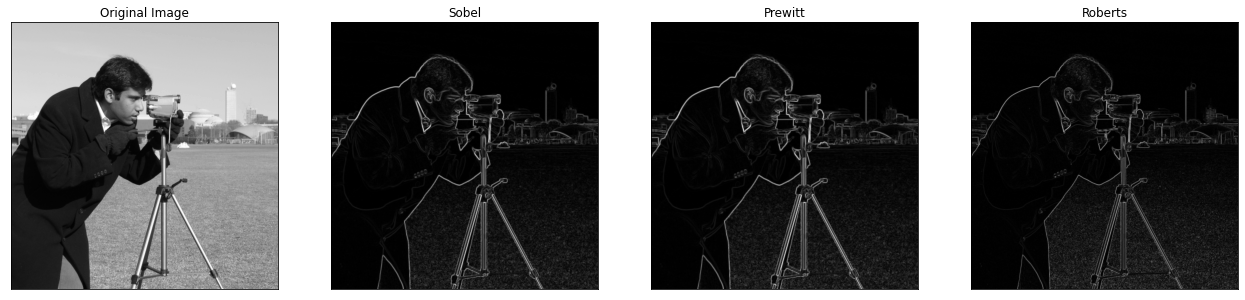

In [ ]:
# solution
camera = data.camera()

sobel_img = filters.sobel(camera)
prewitt_img = filters.prewitt(camera)
roberts_img = filters.roberts(camera)

fig, axs = plt.subplots(1,4, figsize = (22,10))
axs[0].imshow(camera, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(sobel_img, cmap='gray')
axs[1].set_title('Sobel')
axs[2].imshow(prewitt_img, cmap='gray')
axs[2].set_title('Prewitt')
axs[3].imshow(roberts_img, cmap='gray')
axs[3].set_title('Roberts')

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])



*   What is the difference between each of the edge detectors?
*   What does you think is the limitation of each of the detector?



**Solution**

*Prewitt uses uniform weights and is used for detecting horizontal and vertical edges, whereas Sobel uses non-uniform weights to give higher weights to the closer neighbors. Therefore, Sobel is able to both detect edges and smooth the image at the same time. In contrast to these two edge detectors, Roberts uses a 2x2 mask. Roberts and Sobel both use Mean Square Error, but Roberts uses the maximum error whereas Sobel uses the minumum error.*

*One limitation for Sobel and Prewitt is that they are only used for detection horizontal and vertical edges, and are unable to detect diagonal edges. Additionally, because they are larger than the Roberts operator, they are slower to compute. However, because the Roberts operator is only 2x2, it is more sensitive to noise and less likely to detect edges unless they are very strong.*


### Exercise: Canny edge detector
*   Read 'camera' image from the data module
*   Apply canny operator with default parameters
*   Apply canny by varying sigma=1, 3, 5, 10
*   Visualize the original image along with the edges detected using matplotlib.

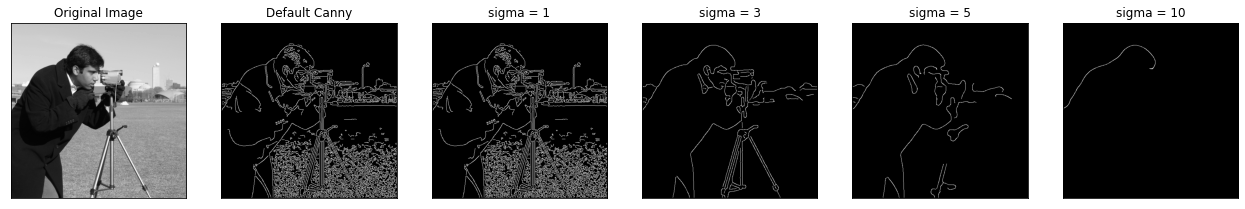

In [ ]:
# solution
canny_img = feature.canny(camera)
canny_img1 = feature.canny(camera, 1)
canny_img3 = feature.canny(camera, 3)
canny_img5 = feature.canny(camera, 5)
canny_img10 = feature.canny(camera, 10)


fig, axs = plt.subplots(1,6, figsize = (22,10))
axs[0].imshow(camera, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(canny_img, cmap='gray')
axs[1].set_title('Default Canny')
axs[2].imshow(canny_img1, cmap='gray')
axs[2].set_title('sigma = 1')
axs[3].imshow(canny_img3, cmap='gray')
axs[3].set_title('sigma = 3')
axs[4].imshow(canny_img5, cmap='gray')
axs[4].set_title('sigma = 5')
axs[5].imshow(canny_img10, cmap='gray')
axs[5].set_title('sigma = 10')

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

*   What is the effect of varying the sigma values on the edges?
*   What do the high threshold and low threshold parameters denote?


**Solution**

- *A lower sigma value detects more edges (including weak edges) and preserves details, whereas a higher sigma value only detects strong edges.*

- *The high threshold and low threshold parameters are used for hysteresis thresholding. All edges with an intensity higher than the high threshold is considered a strong edge, whereas all edges with an intensity lower than the low threshold are not considered to be an edge. If an edge's intensity falls between the high and low thresholds, it is considered a weak edge, and will only be counted as an edge if it is connected to a strong edge.*

*   What is the algorithm behind the Canny operator?


**Solution**

- *Use derivative of Gaussian to filter the image*
- *Obtain the magnitude and the orientation of the gradient*
- *Use non-maximum suppresion to narrow the lines down to the width of one pixel*
- *Apply hysteresis thresholding*

...


---

## **End of P3: Filters and Edges**
Deadline for P3 submission in CampusVirtual is: **Thursday, the 13th of October, 2022**
